In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/file.csv")

#show the dataset
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [ ]:
df.shape

(1511, 6)

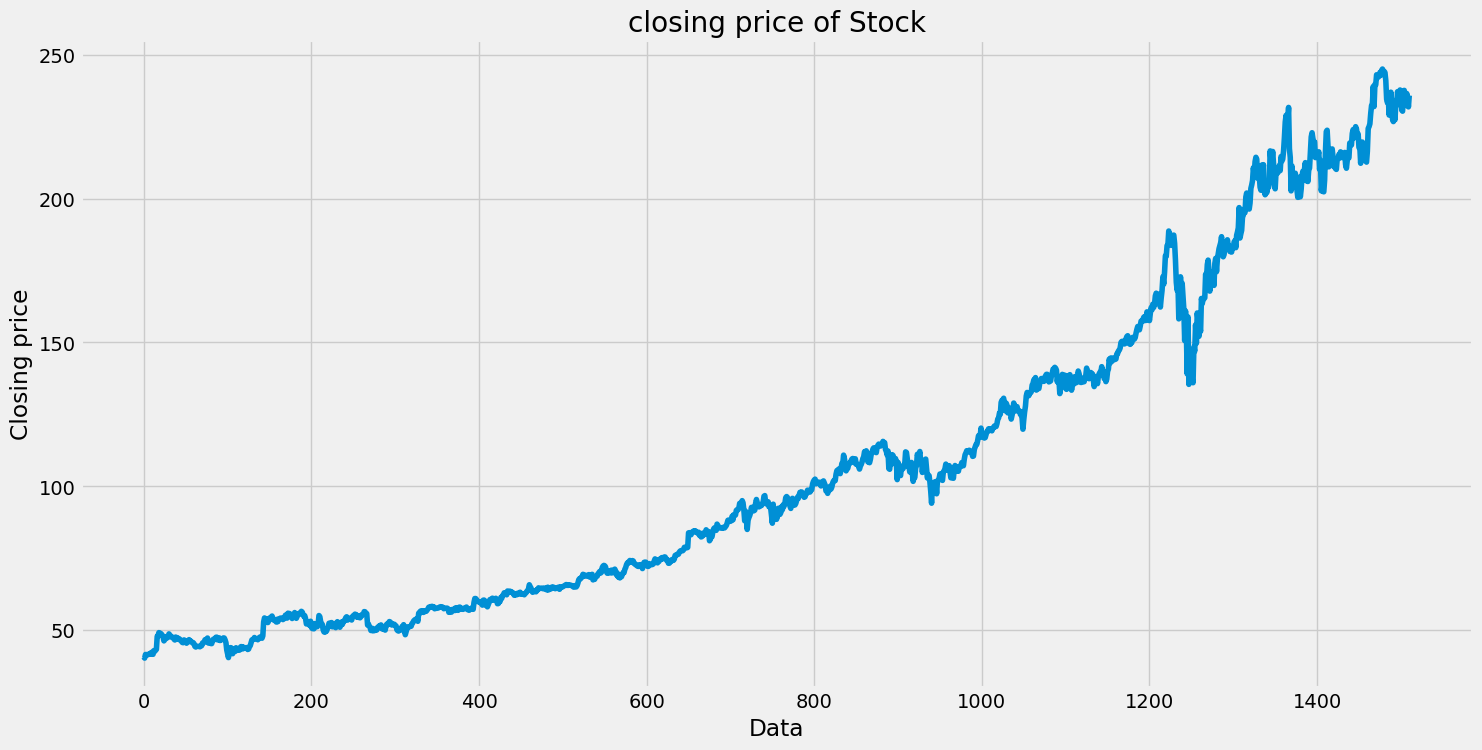

In [ ]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [ ]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1209

In [ ]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  3.009578761657605e-16
Standard deviation of processed data:  0.9999999999999999


In [ ]:
scaled_data

array([[-1.17674549],
       [-1.18433147],
       [-1.16210279],
       ...,
       [ 2.25493901],
       [ 2.19513328],
       [ 2.26428917]])

In [ ]:
if True in df['Close'].isna():
  print('existential crisis')

In [ ]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
import numpy as np
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (1149, 60, 1)
x_train shape after reshaping (1149, 60, 1)


In [ ]:
len(x_train[0])

60

In [ ]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 482,601
Trainable params: 482,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
36/36 [==============================] - 15s 287ms/step - loss: 0.0688
Epoch 2/20
36/36 [==============================] - 10s 284ms/step - loss: 0.0364
Epoch 3/20
36/36 [==============================] - 11s 300ms/step - loss: 0.0364
Epoch 4/20
36/36 [==============================] - 10s 284ms/step - loss: 0.0282
Epoch 5/20
36/36 [==============================] - 9s 259ms/step - loss: 0.0265
Epoch 6/20
36/36 [==============================] - 10s 286ms/step - loss: 0.0279
Epoch 7/20
36/36 [==============================] - 10s 288ms/step - loss: 0.0250
Epoch 8/20
36/36 [==============================] - 10s 288ms/step - loss: 0.0238
Epoch 9/20
36/36 [==============================] - 10s 286ms/step - loss: 0.0287
Epoch 10/20
36/36 [==============================] - 9s 257ms/step - loss: 0.0299
Epoch 11/20
36/36 [==============================] - 10s 288ms/step - loss: 0.0224
Epoch 12/20
36/36 [==============================] - 10s 287ms/step - loss: 0.0244
Epoch 13/20
36/

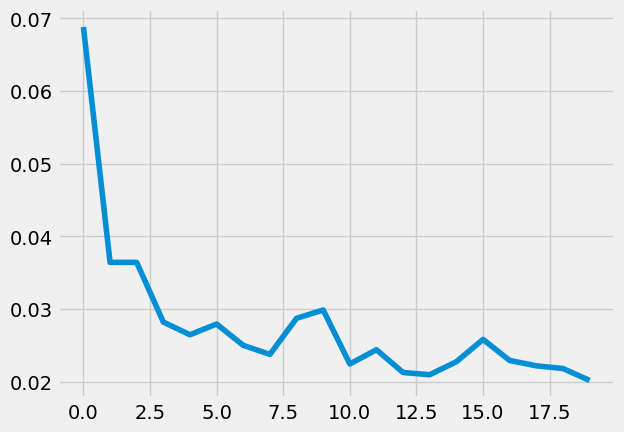

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
import keras
model=keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=1,batch_size=64,verbose=1)

18/18 [==============================] - 9s 106ms/step - loss: 0.0939


In [ ]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to numpy
x_test=np.array(x_test)

In [ ]:
#reshape the data

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

10/10 [==============================] - 1s 23ms/step
[[157.21535]
 [157.55515]
 [157.90398]
 [158.2584 ]
 [158.60608]
 [158.92685]
 [159.22498]
 [159.51207]
 [159.81337]
 [160.12685]
 [160.46703]
 [160.85861]
 [161.30467]
 [161.81416]
 [162.3814 ]
 [163.0123 ]
 [163.68118]
 [164.3692 ]
 [165.055  ]
 [165.72864]
 [166.38687]
 [167.02403]
 [167.62468]
 [168.16032]
 [168.59233]
 [168.89809]
 [169.08205]
 [169.1087 ]
 [168.99176]
 [168.78998]
 [168.50714]
 [168.18272]
 [167.8231 ]
 [167.4205 ]
 [166.93231]
 [166.39198]
 [165.78859]
 [165.06377]
 [164.29172]
 [163.405  ]
 [162.44218]
 [161.39941]
 [160.30034]
 [159.13998]
 [157.92104]
 [156.71901]
 [155.5704 ]
 [154.5468 ]
 [153.64966]
 [152.93155]
 [152.39545]
 [152.00584]
 [151.75046]
 [151.60474]
 [151.6032 ]
 [151.74014]
 [152.00906]
 [152.39201]
 [152.86845]
 [153.45244]
 [154.12665]
 [154.89229]
 [155.74039]
 [156.6372 ]
 [157.5244 ]
 [158.39076]
 [159.21461]
 [159.9963 ]
 [160.73093]
 [161.3979 ]
 [162.0203 ]
 [162.61337]
 [163.1656

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

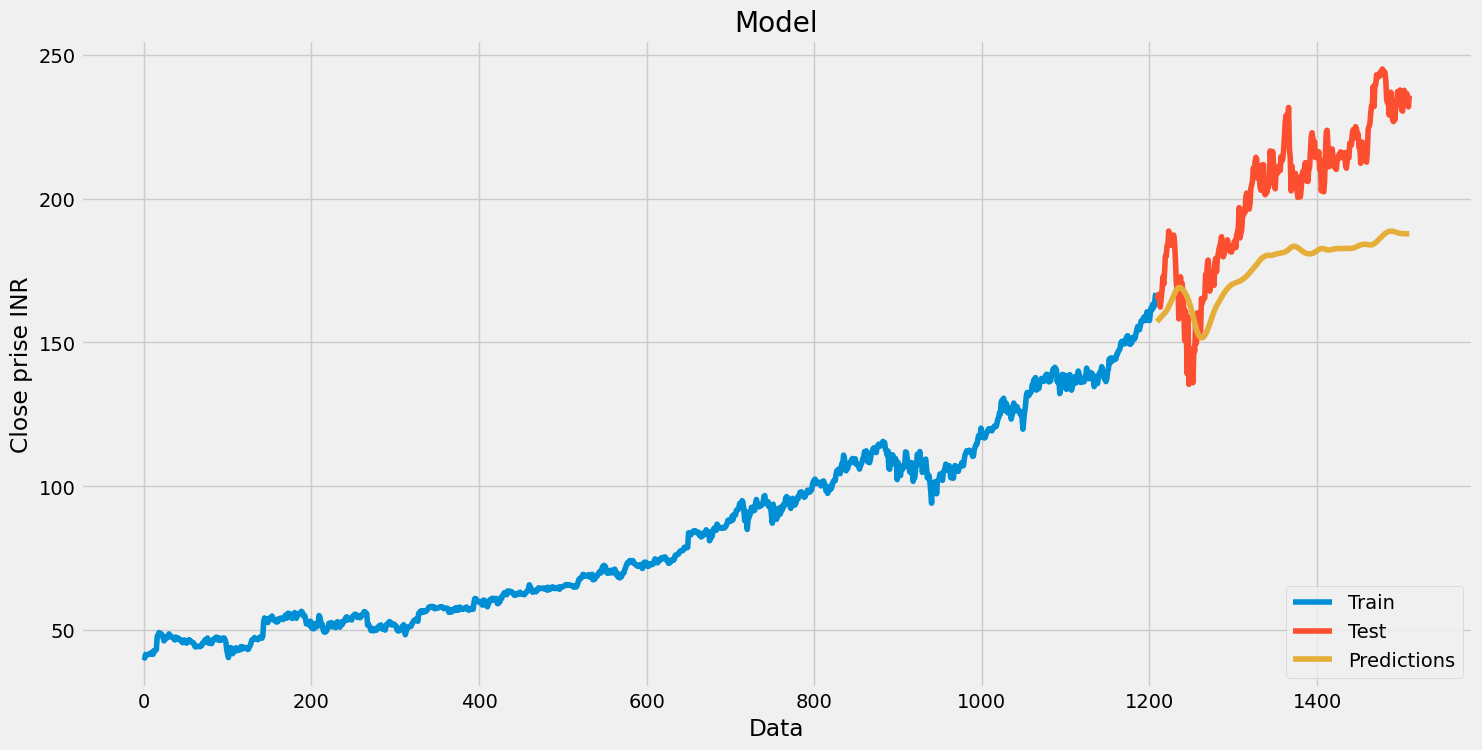

In [ ]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted value
valid

,Close,Predictions
1209,166.50,157.215347
1210,165.70,157.555145
1211,166.72,157.903976
1212,165.04,158.258408
1213,162.28,158.606079
...,...,...
1506,232.34,187.756561
1507,236.48,187.756393
1508,235.24,187.762085
1509,231.85,187.770294
